In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from oivis.oimisc import mcfost_load
from oivis.oifourier import imavis
from oivis.oifits import oifits_read
import importlib
from astropy.io import fits

In [4]:
from scipy.constants import arcsecond

In [5]:
datadir = os.path.dirname(os.path.abspath(".")) + "/data/"

In [6]:
importlib.reload(mcfost_load)
importlib.reload(oifits_read)
importlib.reload(imavis)

<module 'oivis.oifourier.imavis' from '/Users/bergejea/Software/tihpy/oivis/oifourier/imavis.py'>

In [9]:
wavel, pixel, data = mcfost_load.load_cube(datadir + "mcfost_hd100546_RT.fits.gz")

In [10]:
data.shape

(1, 1, 1, 1001, 1001)

In [11]:
file = "Aspro2_HD_100546_mcfost.fits"

In [12]:
# il faut corriger la longueur d'onde car aspro2 ne se sert pas de la longueur d'onde contenue dans le fichier mcfost
# la longueur d'onde de l'oifits est
wavel = 2.2e-6

In [13]:
hdr = fits.open(datadir + file)

In [17]:
oid = oifits_read.Oifits([datadir + file])

In [18]:
freq = [oid.v2data['UCOORD'] / wavel, oid.v2data['VCOORD'] / wavel]

In [19]:
base = np.sqrt(freq[0]**2 + freq[1]**2) * wavel

In [20]:
pixsize = pixel /180 *np.pi 

In [21]:
visas = imavis.ima_to_vis(data[0,0,0,:,::-1]/np.sum(data[0,0,0,:,:]), freq, pixsize, sigmul=0, sigadd=0)

Multiplicative noise variance 0
Additive noise variance 0


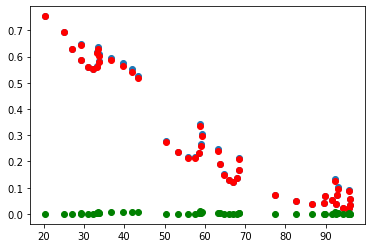

In [22]:
plot(base,np.abs(visas)**2,'o')
plot(base,oid.v2data['VIS2DATA'], 'ro')
plot(base, np.abs(np.abs(visas)**2 - oid.v2data['VIS2DATA']),'go')

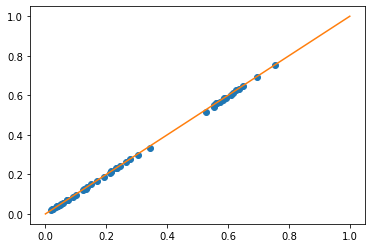

In [24]:
plot(np.abs(visas)**2,oid.v2data['VIS2DATA'],'o' )
plot([0,1],[0,1])

*** Ca marche !!!***

{'FWHM': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'TAU0': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'WINDSP': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'NMEAS': array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]),
 'TARGET': array(['HD 100546', 'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546',
        'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546',
        'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546',
        'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546',
        'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546',
        'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546', 'HD 100546',
        'HD 100546', 'HD 1005